# 0. Librerías

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Flatten, Dense, Reshape
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

2025-06-25 04:44:23.402216: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2025-06-25 04:44:23.402234: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# 1. Preparación de datos (ya preprocesados) y de parámetros

In [3]:
X_train, X_test = np.load('data/x_training.npy'), np.load('data/x_testing.npy')
y_train, y_test = np.load('data/y_training.npy')[:,0] - 1, np.load('data/y_testing.npy')[:,0] - 1

"""
0 = Bottle
1 = Can
2 = Noise
3 = Paper
4 = Ping-pong
"""

INPUT_LENGTH = 4018
NUM_CLASSES = 5
LEARNING_RATE = 0.005

# 2. Architectura del modelo y entrenamiento

In [4]:
model = Sequential([
    Reshape((98, 41), input_shape=(INPUT_LENGTH,)),
    Conv1D(8, kernel_size=3, padding='same', activation='relu'),
    MaxPooling1D(pool_size=2, strides=2, padding='same'),
    Dropout(0.25),
    Conv1D(16, kernel_size=3, padding='same', activation='relu'),
    MaxPooling1D(pool_size=2, strides=2, padding='same'),
    Dropout(0.25),
    Flatten(),
    Dense(NUM_CLASSES, activation='softmax', name='y_pred')
])

model.compile(
    optimizer=Adam(learning_rate=LEARNING_RATE),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 98, 41)            0         
                                                                 
 conv1d (Conv1D)             (None, 98, 8)             992       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 49, 8)            0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 49, 8)             0         
                                                                 
 conv1d_1 (Conv1D)           (None, 49, 16)            400       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 25, 16)           0         
 1D)                                                    

2025-06-25 04:45:10.439334: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-06-25 04:45:10.441928: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2025-06-25 04:45:10.442007: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2025-06-25 04:45:10.442063: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2025-06-25 04:45:10.442118: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [5]:
history = model.fit(X_train,y_train, epochs=100, batch_size=32, verbose=2)

Epoch 1/100
7/7 - 0s - loss: 1.5551 - accuracy: 0.2591 - 291ms/epoch - 42ms/step
Epoch 2/100
7/7 - 0s - loss: 1.3462 - accuracy: 0.3545 - 12ms/epoch - 2ms/step
Epoch 3/100
7/7 - 0s - loss: 1.1128 - accuracy: 0.5182 - 12ms/epoch - 2ms/step
Epoch 4/100
7/7 - 0s - loss: 0.8451 - accuracy: 0.6182 - 12ms/epoch - 2ms/step
Epoch 5/100
7/7 - 0s - loss: 0.6666 - accuracy: 0.7682 - 12ms/epoch - 2ms/step
Epoch 6/100
7/7 - 0s - loss: 0.5647 - accuracy: 0.7636 - 11ms/epoch - 2ms/step
Epoch 7/100
7/7 - 0s - loss: 0.5632 - accuracy: 0.7682 - 11ms/epoch - 2ms/step
Epoch 8/100
7/7 - 0s - loss: 0.4007 - accuracy: 0.8500 - 11ms/epoch - 2ms/step
Epoch 9/100
7/7 - 0s - loss: 0.2840 - accuracy: 0.9136 - 10ms/epoch - 1ms/step
Epoch 10/100
7/7 - 0s - loss: 0.2689 - accuracy: 0.9182 - 12ms/epoch - 2ms/step
Epoch 11/100
7/7 - 0s - loss: 0.2988 - accuracy: 0.9045 - 12ms/epoch - 2ms/step
Epoch 12/100
7/7 - 0s - loss: 0.2473 - accuracy: 0.9045 - 12ms/epoch - 2ms/step
Epoch 13/100
7/7 - 0s - loss: 0.2432 - accuracy

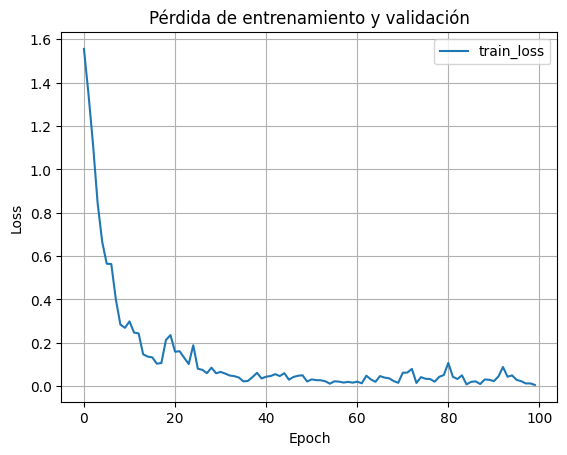

In [6]:
plt.plot(history.history['loss'], label='train_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Pérdida de entrenamiento y validación')
plt.grid(True)
plt.show()

In [7]:
model.predict(X_train).shape

(220, 5)

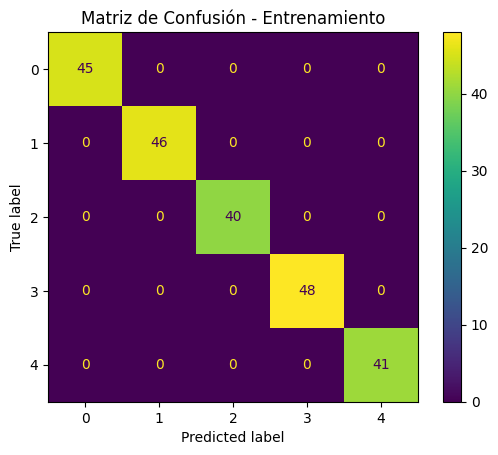

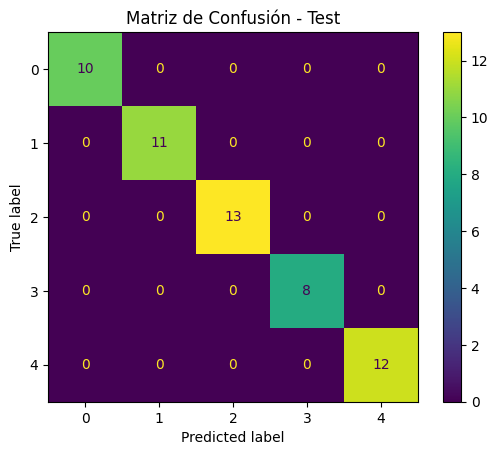

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Para TRAIN
y_pred_train = np.argmax(model.predict(X_train),axis=1)
cm_train = confusion_matrix(y_train, y_pred_train)

disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp_train.plot()
plt.title("Matriz de Confusión - Entrenamiento")
plt.show()

# Para TEST
y_pred_test = np.argmax(model.predict(X_test), axis=1)
cm_test = confusion_matrix(y_test, y_pred_test)

disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp_test.plot()
plt.title("Matriz de Confusión - Test")
plt.show()

# 3. Cuantización y exportaciṕn al ESP32

In [9]:
def representative_dataset_gen():
    for i in range(100):  # De forma arbitraria se decidió un sampling de 100
        sample = X_train[i].astype(np.float32)
        sample = np.expand_dims(sample, axis=0)  # shape = (1, 4018)
        yield [sample]

# Configurar el convertidor
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Paso clave: usar la función representativa
converter.representative_dataset = representative_dataset_gen

# Indicar que todo el modelo debe usar operaciones int8
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]

# Forzar entrada y salida como int8 (lo que ESP32 espera)
converter.inference_input_type = tf.int8
converter.inference_output_type = tf.int8

# Convertir el modelo
tflite_model = converter.convert()

# Guardar el modelo
with open("model_quantized_int8.tflite", "wb") as f:
    f.write(tflite_model)

2025-06-25 04:46:34.913528: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /tmp/tmp2rks_0yq/assets


2025-06-25 04:46:35.575980: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:363] Ignored output_format.
2025-06-25 04:46:35.576001: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:366] Ignored drop_control_dependency.
2025-06-25 04:46:35.576439: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /tmp/tmp2rks_0yq
2025-06-25 04:46:35.577757: I tensorflow/cc/saved_model/reader.cc:107] Reading meta graph with tags { serve }
2025-06-25 04:46:35.577771: I tensorflow/cc/saved_model/reader.cc:148] Reading SavedModel debug info (if present) from: /tmp/tmp2rks_0yq
2025-06-25 04:46:35.583553: I tensorflow/cc/saved_model/loader.cc:210] Restoring SavedModel bundle.
2025-06-25 04:46:35.606321: I tensorflow/cc/saved_model/loader.cc:194] Running initialization op on SavedModel bundle at path: /tmp/tmp2rks_0yq
2025-06-25 04:46:35.614978: I tensorflow/cc/saved_model/loader.cc:283] SavedModel load for tags { serve }; Status: success: OK. Took 38541 